In [50]:
import pandas as pd
import librosa
import os
import numpy as np 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder


In [10]:
audio_path = 'spectogram/'
spectograms = os.listdir(audio_path)


In [44]:


def get_label(filename):

    metadata = pd.read_csv('metadata.csv', sep = ',')
    chords = {}

    png_name = filename.replace('.png', '.wav')
    chord = metadata[metadata['Filename'] == png_name]['Acorde'].values[0]

    return chord


In [35]:
labelled_df = get_label(spectograms)
labelled_df.values()

dict_values(['F#:maj', 'B:maj', 'F#:maj', 'C#:maj', 'B:maj', 'F#:maj', 'A#:maj', 'F:maj', 'G:min', 'D:min', 'D#:maj', 'A#:maj', 'D#:maj', 'F:maj', 'A#:maj', 'F:maj', 'G:min', 'D:min', 'D#:maj', 'A#:maj', 'D#:maj', 'F:maj', 'E:min', 'A:7', 'D:maj', 'G:maj', 'C#:hdim7', 'F#:7', 'B:min', 'E:min', 'A:7', 'D:maj', 'G:maj', 'C#:hdim7', 'F#:7', 'B:min', 'C:min', 'F:7', 'A#:maj', 'D#:maj', 'A:hdim7', 'D:7', 'G:min', 'C:min', 'F:7', 'A#:maj', 'D#:maj', 'A:hdim7', 'D:7', 'G:min', 'A#:maj', 'F:maj', 'G:min', 'D:min', 'D#:maj', 'A#:maj', 'D#:maj', 'F:maj', 'A#:maj', 'F:maj', 'G:min', 'D:min', 'D#:maj', 'A#:maj', 'D#:maj', 'F:maj', 'C#:min', 'F#:7', 'B:maj', 'E:maj', 'A#:hdim7', 'D#:7', 'G#:min', 'C#:min', 'F#:7', 'B:maj', 'E:maj', 'A#:hdim7', 'D#:7', 'G#:min', 'D#:maj', 'G#:maj', 'D#:maj', 'A#:maj', 'G#:maj', 'D#:maj', 'C:maj', 'G:maj', 'A:min', 'E:min', 'F:maj', 'C:maj', 'F:maj', 'G:maj', 'C:maj', 'G:maj', 'A:min', 'E:min', 'F:maj', 'C:maj', 'F:maj', 'G:maj', 'C#:maj', 'F#:maj', 'C#:maj', 'G#:maj

In [47]:
from keras.preprocessing import image
# ref -> https://github.com/jeffprosise/Deep-Learning/blob/master/Audio%20Classification%20(CNN).ipynb
def load_images_from_path(path):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        labels.append(get_label(file))
    return images,labels     


img_np, labels = load_images_from_path(audio_path)

In [81]:
code = np.array(labels)

label_encoder = LabelEncoder()
int_labels = label_encoder.fit_transform(code)

# mapeando acordes para o número de codificação
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))


x_train, x_test, y_train, y_test = train_test_split(img_np, int_labels, stratify=int_labels, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255


y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)



In [69]:
len(set(labels))

34

In [82]:

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(34, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     36992     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       147584    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 128)      

In [83]:
hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10)

Epoch 1/10
12/12 [==============================] - 13s 948ms/step - loss: 3.8235 - accuracy: 0.0885 - val_loss: 3.4623 - val_accuracy: 0.0816
Epoch 2/10
12/12 [==============================] - 11s 890ms/step - loss: 3.4462 - accuracy: 0.0531 - val_loss: 3.3848 - val_accuracy: 0.0816
Epoch 3/10
12/12 [==============================] - 11s 891ms/step - loss: 3.3765 - accuracy: 0.0796 - val_loss: 3.3722 - val_accuracy: 0.0816
Epoch 4/10
12/12 [==============================] - 11s 893ms/step - loss: 3.4027 - accuracy: 0.0531 - val_loss: 3.3848 - val_accuracy: 0.0816
Epoch 5/10
12/12 [==============================] - 11s 893ms/step - loss: 3.3498 - accuracy: 0.1327 - val_loss: 3.3687 - val_accuracy: 0.1020
Epoch 6/10
12/12 [==============================] - 11s 892ms/step - loss: 3.2653 - accuracy: 0.1327 - val_loss: 3.3509 - val_accuracy: 0.0816
Epoch 7/10
12/12 [==============================] - 11s 891ms/step - loss: 3.1618 - accuracy: 0.1239 - val_loss: 3.2419 - val_accuracy: 0.1020

[]

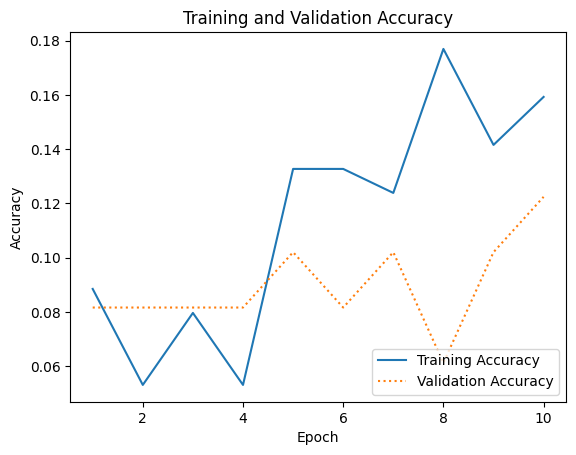

In [85]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()